In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.basics import *

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
torch.backends.cudnn.enabled

True

# Start getting data and train

Data is from Kaggle competition.

In [5]:
import pathlib
path = pathlib.Path.cwd()/'planet'

In [6]:
# Get the label
df = pd.read_csv(path/"train_v2.csv")
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [7]:
# The transform function
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [8]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' ' ))

In [9]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

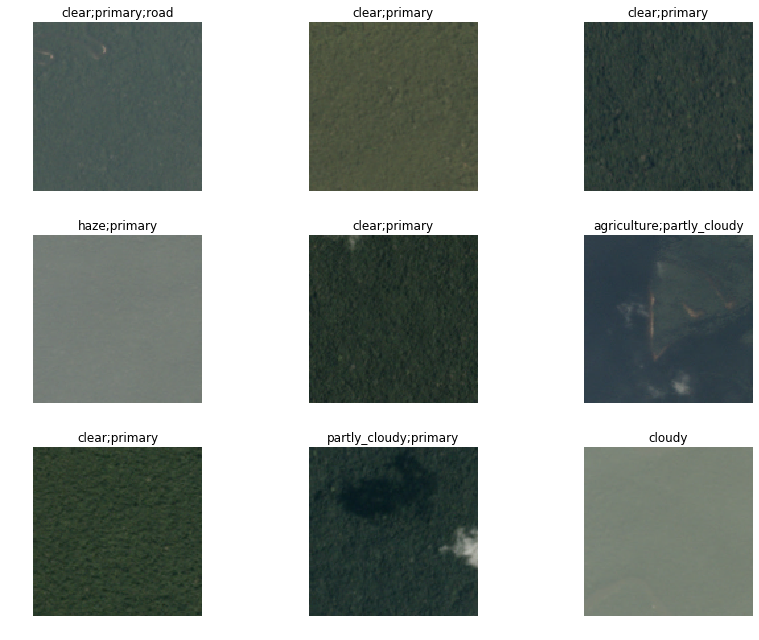

In [10]:
data.show_batch(rows=3, figsize=(12,9))

In [11]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, models.resnet50, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-02


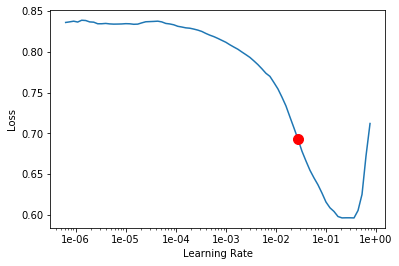

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
lr = 2e-02

In [15]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.119645,0.111246,0.950238,0.901141
2,0.117661,0.105572,0.944352,0.907372
3,0.107447,0.099602,0.959002,0.914271
4,0.093274,0.116232,0.955470,0.922130
5,0.088861,0.118202,0.957432,0.924963


In [16]:
learn.save('stage-1-rn50')

In [34]:
learn.load('stage-1-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (32384 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/luan/fastai-v3/nbs/dl1/Luan_test/planet;

Valid: LabelList (8095 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
Path: /home/luan/fastai-v3/nbs/dl1/Luan_test/planet;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  

In [17]:
# Normal fine-tuning
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-05


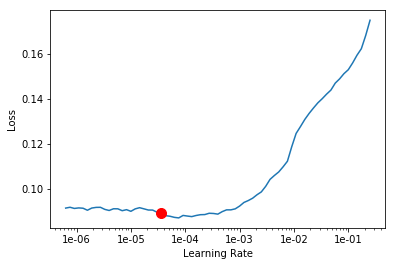

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5, slice(1e-05, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.097198,0.098710,0.955310,0.919624
2,0.099239,0.171435,0.954925,0.920473
3,0.090264,0.099398,0.958369,0.925880
4,0.089247,0.097763,0.958479,0.928171
5,0.084526,0.082873,0.958587,0.929350


In [20]:
learn.save('stage-2-rn50')

In [27]:
# Figure out bs
data.batch_size

64

In [12]:
learn.load('stage-2-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (32384 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/luan/fastai-v3/nbs/dl1/Luan_test/planet;

Valid: LabelList (8095 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
Path: /home/luan/fastai-v3/nbs/dl1/Luan_test/planet;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  

In [13]:
data = (src.transform(tfms, size=256)
        .databunch(bs=50).normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [14]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06


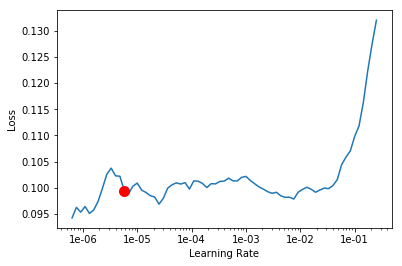

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
lr = 1e-02/2

In [17]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.088824,0.097854,0.958929,0.926496
2,0.092782,0.120406,0.958042,0.925657
3,0.086345,0.100562,0.957948,0.929278
4,0.082771,0.114913,0.958289,0.930395
5,0.082876,0.126002,0.960266,0.930195


In [18]:
learn.save('stage-1-256-rn50')

In [12]:
learn.load('stage-1-256-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (32384 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/luan/fastai-v3/nbs/dl1/Luan_test/planet;

Valid: LabelList (8095 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
Path: /home/luan/fastai-v3/nbs/dl1/Luan_test/planet;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  

In [19]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.086200,0.137617,0.958137,0.928466
2,0.087092,0.109559,0.957149,0.926727
3,0.082813,0.197596,0.956669,0.928550
4,0.078760,0.167447,0.958660,0.930319
5,0.079349,0.158389,0.958747,0.930682


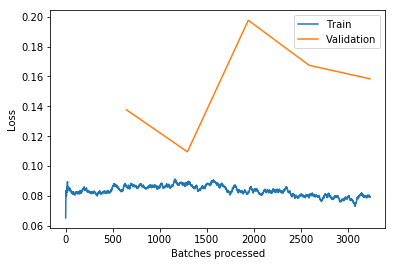

In [21]:
learn.recorder.plot_losses()

In [22]:
learn.save('stage-2-256-rn50')

The Validation error is not correct :(. Hmmmm.....Retrain a bit :D

In [12]:
learn.load('stage-1-256-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (32384 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/luan/fastai-v3/nbs/dl1/Luan_test/planet;

Valid: LabelList (8095 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
Path: /home/luan/fastai-v3/nbs/dl1/Luan_test/planet;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  

In [13]:
data = (src.transform(tfms, size=256)
        .databunch(bs=62).normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [14]:
learn.unfreeze()
lr = 1e-02/2

In [15]:
learn.data.batch_size = 40

In [17]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.086724,0.148745,0.960789,0.927836
2,0.090700,0.217010,0.955215,0.922064
3,0.083707,0.142441,0.958536,0.924965
4,0.083026,0.179310,0.958580,0.929904
5,0.080307,0.148951,0.960498,0.930699


In [16]:
data.batch_size   # Bach size looks correct :D

40